In [373]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.callbacks import EarlyStopping
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

**Objetivo**

Crear un modelo predictivo usando redes neuronales para predecir el acento en el idioma Español usando una grabacion de audio.

Los diferentes acentos a predecir son los siguientes:

'chileno', 'surpeninsular', 'andino', nan, 'caribe',
'nortepeninsular', 'mexicano', 'rioplatense', 'americacentral',
'centrosurpeninsular', 'canario', 'filipinas'

**Biblioteca para extracción de caracteristicas de audio**

Librosa es una biblioteca de análisis de audio y música de Python muy útil que ayuda a los desarrolladores de software a crear aplicaciones para trabajar con formatos de archivos de audio y música utilizando Python. https://products.fileformat.com/es/audio/python/librosa/

Con esta biblioteca se extraen las características que están relacionadas con la calidad de audio a través de las cuales el modelo aprenderá de manera más efectiva.

**Plataforma de descarga**


La plataforma https://commonvoice.mozilla.org/en/datasets es una iniciativa basada en machine learning para enseñarle a las maquinas a hablar como las personas  y se pueden descargar de forma gratuita set de datos de diferente tamaño. Para el caso de este proyecto se descargó un data set con las siguientes caraceristicas:

Idioma Español

Version	Common Voice Corpus 4 

Fecha  1/13/2020

Tamaño   5.8 GB

horas de grabación	222

horas validadas     168

Licencia         CC-0

Numero de voces    8,252

Formato Audio     MP3


**Carga de datos**

In [285]:
data_train = pd.read_table('train.tsv')


In [286]:
data_train.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742144.mp3,Tras su lanzamiento ha recibido positivas rese...,2,1,thirties,male,chileno
1,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742146.mp3,"Las hojas se secan a la sombra, en un lugar ai...",2,1,thirties,male,chileno
2,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742323.mp3,Por este motivo no pudo integrar la selección ...,2,0,thirties,male,chileno
3,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742324.mp3,Es profundo y navegable sin problemas a medio ...,2,0,thirties,male,chileno
4,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742325.mp3,Pretendía recoger la herencia de revistas como...,2,0,thirties,male,chileno


In [287]:
data_train.shape

(64353, 8)

**Valores Nulos**

In [291]:
pymesmissed=data_train.isnull()
#columnas con valores nulos y su porcentaje
columnas_connull=[]
# porcentajes por columna de valores nulos
porc_valoresnull=[]
for column in pymesmissed.columns.values.tolist():
    
    if ((pymesmissed[column]).value_counts()[0]*100/len(pymesmissed))<100:
        columnas_connull.append(column)
        porc_valoresnull.append(float("{0:.3f}".format((pymesmissed[column]).value_counts()[1]*100/len(pymesmissed))))
        print(column,"% valores no nulos y nulos")
        print ((pymesmissed[column]).value_counts()*100/len(pymesmissed))
        print("")
print ("lista de columnas con valores nulos: ",columnas_connull)

print ("lista porcentajes con valores nulos: ",porc_valoresnull)

age % valores no nulos y nulos
False    81.02031
True     18.97969
Name: age, dtype: float64

gender % valores no nulos y nulos
False    80.850932
True     19.149068
Name: gender, dtype: float64

accent % valores no nulos y nulos
False    69.539882
True     30.460118
Name: accent, dtype: float64

lista de columnas con valores nulos:  ['age', 'gender', 'accent']
lista porcentajes con valores nulos:  [18.98, 19.149, 30.46]


**Eliminando valores nulos**

In [292]:
data=data_train.dropna()

**Nuevo tamaño del data set**

44445

In [293]:
data.shape

(44445, 8)

**Valores unicos**

In [294]:
data["age"].unique()

array(['thirties', 'teens', 'twenties', 'fifties', 'fourties', 'sixties',
       'nineties', 'seventies'], dtype=object)

In [295]:
data["gender"].unique()

array(['male', 'female', 'other'], dtype=object)

In [296]:
data["accent"].unique()

array(['chileno', 'surpeninsular', 'andino', 'caribe', 'nortepeninsular',
       'mexicano', 'rioplatense', 'americacentral', 'centrosurpeninsular',
       'canario', 'filipinas'], dtype=object)

In [297]:
data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent
0,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742144.mp3,Tras su lanzamiento ha recibido positivas rese...,2,1,thirties,male,chileno
1,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742146.mp3,"Las hojas se secan a la sombra, en un lugar ai...",2,1,thirties,male,chileno
2,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742323.mp3,Por este motivo no pudo integrar la selección ...,2,0,thirties,male,chileno
3,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742324.mp3,Es profundo y navegable sin problemas a medio ...,2,0,thirties,male,chileno
4,434506bc3f04b27f5c2dbd2fdcf3217c1e3f9da1243bc9...,common_voice_es_19742325.mp3,Pretendía recoger la herencia de revistas como...,2,0,thirties,male,chileno


**Visualizacón de la variable género por edades**

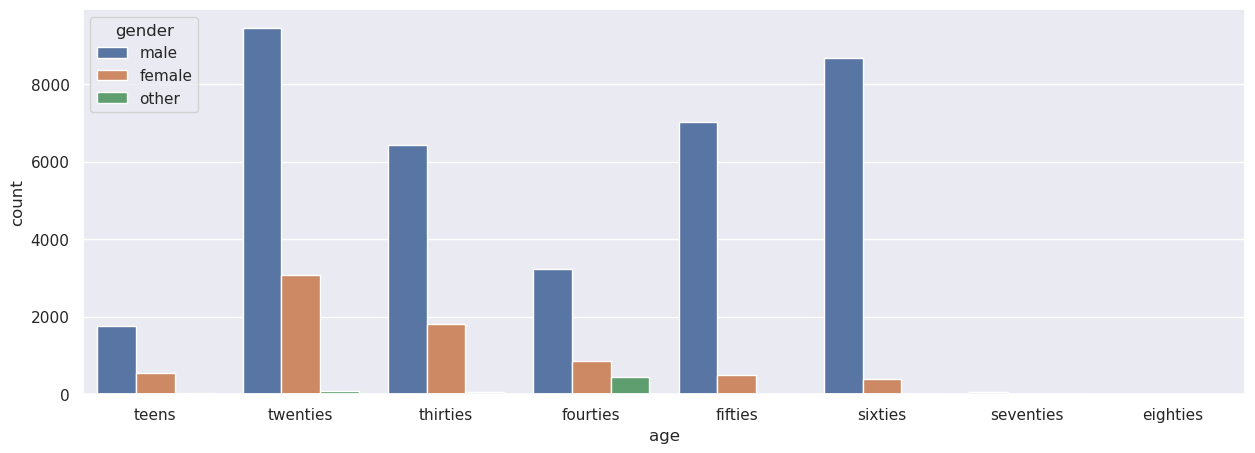

In [298]:


sns.countplot(x="age", 
        hue='gender',
        data=data,
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()



In [300]:
data["gender"].value_counts()

male      36597
female     7195
other       653
Name: gender, dtype: int64

**Histograma por edades**

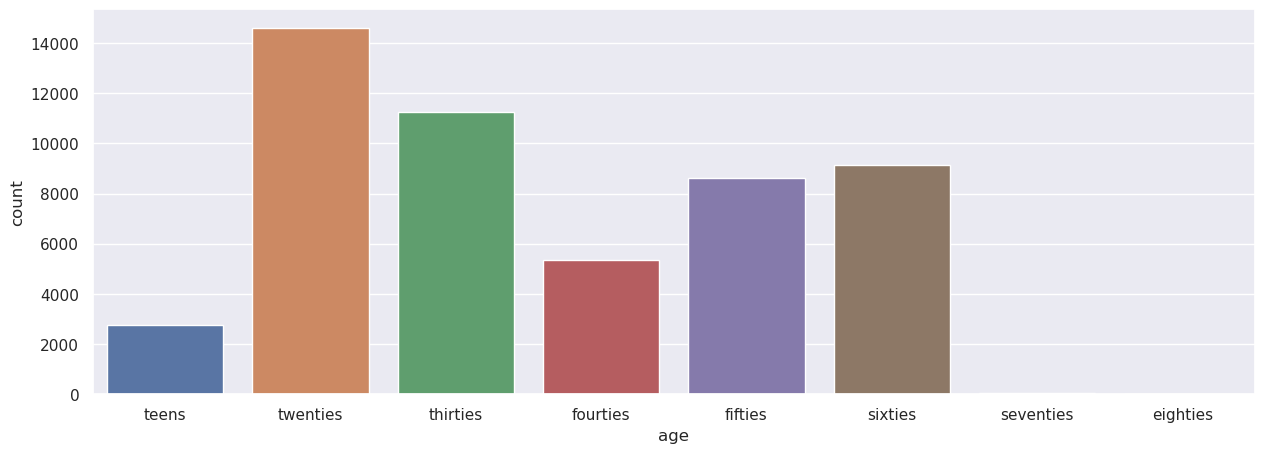

In [12]:


sns.set(rc={'figure.figsize':(15, 5)})
sns.countplot(x="age", 
        data=data, 
        order=['teens', 'twenties', 'thirties', 'fourties', 'fifties', 'sixties', 'seventies', 'eighties'])

plt.show()



In [301]:
data["age"].value_counts()

twenties     12622
sixties       9080
thirties      8291
fifties       7506
fourties      4512
teens         2338
seventies       54
nineties        42
Name: age, dtype: int64

**Visualización de acento por género**

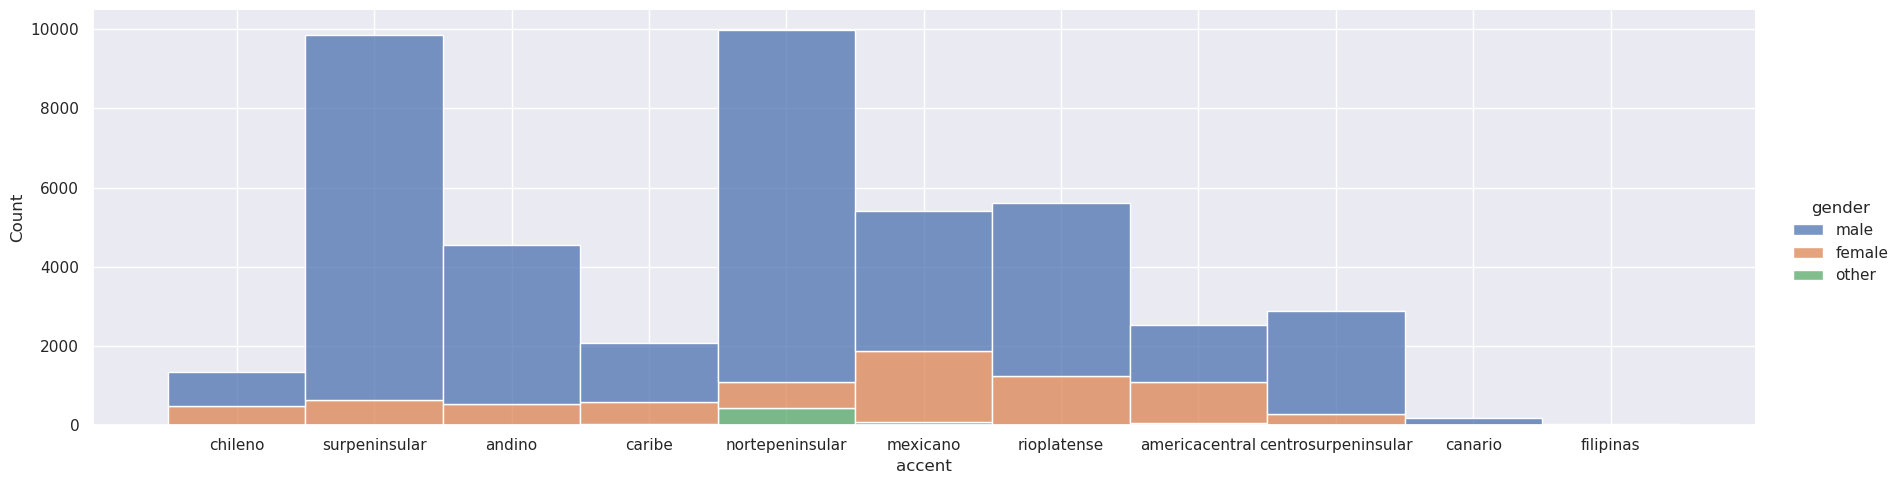

In [15]:
sns.displot(x="accent", 
        data=data, 
        hue='gender',
        multiple='stack',
        height=5, aspect=18/5)

plt.show()

In [303]:
data["accent"].value_counts()

nortepeninsular        9986
surpeninsular          9842
rioplatense            5605
mexicano               5405
andino                 4560
centrosurpeninsular    2875
americacentral         2535
caribe                 2079
chileno                1344
canario                 188
filipinas                26
Name: accent, dtype: int64

**Modelo para la predicción del acento en el idioma Español**

Se crea un modelo para predecir el acento en Español, usando las variables path con el nombre del archivo de audio y la variable accent con el acento. Las otras variables no se utilizan para este modelo

In [305]:
data_accent=data[["path","accent"]]

In [306]:
data_accent.head()

,path,accent
0,common_voice_es_19742144.mp3,chileno
1,common_voice_es_19742146.mp3,chileno
2,common_voice_es_19742323.mp3,chileno
3,common_voice_es_19742324.mp3,chileno
4,common_voice_es_19742325.mp3,chileno


In [307]:
data_accent.shape

(44445, 2)

**Estracción de las caracteristicas de audio**

Extracción de características

Las siguientes características están relacionadas con la calidad de audio a través de las cuales el modelo aprenderá de manera más efectiva. 

Centroide espectral: cada cuadro de un espectrograma de magnitud se normaliza y se trata como una distribución sobre contenedores de frecuencia, de los cuales se extrae la media (centroide) por cuadro.

Ancho de banda espectral: calcule el ancho de banda espectral de segundo orden

Rolloff espectral: la frecuencia central para un contenedor de espectrograma tal que al menos el porcentaje de balance (0.85 por defecto) de la energía del espectro en este marco está contenido en este contenedor y los contenedores debajo

Coeficientes cepstrales de frecuencia Mel (MFCC): un pequeño conjunto de 20 características que describen la forma general de una envolvente espectral

**Ejemplo del nombre de un archivo de audio**

In [308]:
data_accent.iloc[0]['path']

'common_voice_es_19742144.mp3'

**Función para extraer las frecuencias y nuevas variables de cada audio**

In [309]:
# Ruta de los clips de audio en la carpeta clips
ruta = "clips/"
#Funcion para extraer las frecuencias de audio

def features_audio(filename, sampling_rate=44445):
    path = "{}{}".format(ruta, filename)
    features = list()
    audio, _ = librosa.load(path, sr=sampling_rate)
   
    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=audio, sr=sampling_rate))
    spectral_bandwidth = np.mean(librosa.feature.spectral_bandwidth(y=audio, sr=sampling_rate))
    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=audio, sr=sampling_rate))
    
    features.append(spectral_centroid)
    features.append(spectral_bandwidth)
    features.append(spectral_rolloff)
    
    mfcc = librosa.feature.mfcc(y=audio, sr=sampling_rate)
    for el in mfcc:
        features.append(np.mean(el))
    
    return features
    
        
features = features_audio(data_accent.iloc[0]['path'])
print("features: ", features)

features:  [1753.6846206145137, 1477.20363479064, 3141.1374251568905, -753.67755, 111.529495, -14.891884, 32.386818, 16.976667, 0.48450807, 12.2235565, -13.570015, -9.274376, 4.6638584, -6.9683642, -1.3544341, -0.9845055, -5.4458847, 1.8691795, -6.4992595, -7.157085, 3.7556443, -2.124862, -6.104575]


**Función para crear un dataframe con las nuevas variables**

In [311]:

# funcion para crear un dataframe y el label con la variable accent
def create_df_features(orig):
    new_rows = list()
    tot_rows = len(orig)-1
    stop_counter = 44444
    
    for idx, row in orig.iterrows():
        if idx >= stop_counter: break
        print("\r", end="")
        print("{}/{}".format(idx, tot_rows), end="", flush=True)
        features = features_audio(row['path'])
        features.append(row['accent'])
        new_rows.append(features)
    # Variables de audio nuevas extraidas con la biblioteca librosa para cada audio y la variable label
    return pd.DataFrame(new_rows, columns=["spectral_centroid", "spectral_bandwidth", "spectral_rolloff",
                                    "mfcc1", "mfcc2", "mfcc3", "mfcc4", "mfcc5", "mfcc6", "mfcc7", "mfcc8",
                                   "mfcc9", "mfcc10", "mfcc11", "mfcc12", "mfcc13", "mfcc14", "mfcc15", "mfcc16",
                                   "mfcc17", "mfcc18", "mfcc19", "mfcc20", "label"])

df_features = create_df_features(data_accent)
df_features.head()

44443/44444

,spectral_centroid,spectral_bandwidth,spectral_rolloff,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,1753.684621,1477.203635,3141.137425,-753.677551,111.529495,-14.891884,32.386818,16.976667,0.484508,12.223557,...,-1.354434,-0.984505,-5.445885,1.869179,-6.499259,-7.157085,3.755644,-2.124862,-6.104575,chileno
1,1608.503231,1350.649179,2840.549025,-751.707947,101.793427,-1.654322,20.827723,7.726812,-0.498046,9.500772,...,-0.941665,1.066927,-4.366856,0.876207,-4.137426,-7.013849,1.518846,-0.651390,-5.665789,chileno
2,2257.280356,1905.172457,4291.304198,-632.363586,107.227280,-22.854773,23.550463,5.039533,-6.552866,11.901673,...,-0.650442,0.482413,-10.381965,1.791126,-3.914446,-9.117221,6.320590,1.568029,-7.132372,chileno
3,1993.084625,1706.249178,3610.769938,-566.591248,126.514748,-34.041363,19.838827,3.390831,-4.865060,13.271871,...,-0.460630,2.224522,-11.641500,1.149605,-1.471800,-9.890483,3.342896,1.515601,-6.136133,chileno
4,1548.633266,1524.461998,2983.847011,-561.211365,133.078033,-17.351246,18.837166,5.071126,-4.677625,12.835022,...,-1.986158,4.246021,-10.774783,-0.847960,-2.847659,-10.007349,3.943109,0.218349,-8.277620,chileno


**Tamaño del nuevo dataframe**

28246

In [312]:
df_features.shape

(28246, 24)

**Tipos de acentos en Español a entrenar**

In [313]:
df_features["label"].unique()

array(['chileno', 'surpeninsular', 'andino', 'caribe', 'nortepeninsular',
       'mexicano', 'rioplatense', 'americacentral', 'centrosurpeninsular',
       'canario', 'filipinas'], dtype=object)

**Escalado de las nuevas variables**

In [314]:
#escalado de las features sin el label

def scale_features(data):
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(np.array(data.iloc[:, 0:-1], dtype = float))
        
    return scaled_data, scaler

X, scaler = scale_features(df_features)

**Label encoder**

In [321]:

def get_labels(data):
    labels = data.iloc[:, -1]
    encoder = LabelEncoder()
    labels = encoder.fit_transform(labels)
    return labels, encoder

y, encoder = get_labels(df_features)
classes = encoder.classes_
print("Antes encoding:", df_features.iloc[0].values[-1])
print("\nDespues encoding:", y[0])
print("\nClasses:", classes)

Antes encoding: chileno

Despues encoding: 5

Classes: ['americacentral' 'andino' 'canario' 'caribe' 'centrosurpeninsular'
 'chileno' 'filipinas' 'mexicano' 'nortepeninsular' 'rioplatense'
 'surpeninsular']


In [322]:
len(y)

28246

In [323]:
len(X)

28246

In [324]:
len(classes)

11

**División del data set en datos de entrenamiento y test**

In [325]:
#se divide la data en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=123)
#shapes
X_train.shape, X_test.shape, X_val.shape, len(y_train), len(y_test), len(y_val)

((15888, 23), (7062, 23), (5296, 23), 15888, 7062, 5296)

**Modelo usando redes neuronales**



Se evaluaron varios modelos cambiando el numero de neuronas en las diferentes capas con valores de 128, 64, 32 y 512 neuronas llegando al mejor modelo con la siguiente configuración.

Tenemos una capa con las 23 variables como variable input y con 23 neuronas y con una función de activación relu, las siguientes 2 capas 512 neuronas y activación relu y usando dropout para evitar sobreajuste, posteriormente otra capa con 256 neuronas y activación relu tambien con un dropout y por ultimo una capa densa con 11 neuronas que genera los 11 acentos en las que se supone que el modelo clasifica las grabaciones de audio y se usa una función de activación softmax

In [349]:
##--construimos el modelo CNN

model = Sequential()
model.add(Dense(23, input_shape=(23,), activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))  
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.1)) 
model.add(Dense(11, activation = 'softmax'))##<-- numero de categorias a predecir





# Compilar el modelo

In [350]:
# usamoscomo metrica el accuracy
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['acc'])

In [351]:
# usamos early stopping para evitar sobre ajuste
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=100, verbose=1, mode='auto')


# Ajustar el modelo

In [352]:
# corremos el modelo con 100 epocas de entrenamiento de la red y un batch size de 512 que es la cantidad de muestras que se le entregara a la red para que esta entrene

history = model.fit(X_train, y_train, epochs=100, batch_size=512, validation_data=(X_val, y_val),callbacks=[early_stop], shuffle=False)



Epoch 1/100
32/32 [==============================] - 1s 11ms/step - loss: 1.9828 - acc: 0.3093 - val_loss: 1.7500 - val_acc: 0.4156
Epoch 2/100
32/32 [==============================] - 0s 8ms/step - loss: 1.7164 - acc: 0.4138 - val_loss: 1.5656 - val_acc: 0.4783
Epoch 3/100
32/32 [==============================] - 0s 8ms/step - loss: 1.5895 - acc: 0.4616 - val_loss: 1.4379 - val_acc: 0.5234
Epoch 4/100
32/32 [==============================] - 0s 8ms/step - loss: 1.4746 - acc: 0.5059 - val_loss: 1.3437 - val_acc: 0.5591
Epoch 5/100
32/32 [==============================] - 0s 8ms/step - loss: 1.3852 - acc: 0.5373 - val_loss: 1.2529 - val_acc: 0.5954
Epoch 6/100
32/32 [==============================] - 0s 9ms/step - loss: 1.3160 - acc: 0.5670 - val_loss: 1.1750 - val_acc: 0.6224
Epoch 7/100
32/32 [==============================] - 0s 9ms/step - loss: 1.2515 - acc: 0.5864 - val_loss: 1.1045 - val_acc: 0.6471
Epoch 8/100
32/32 [==============================] - 0s 8ms/step - loss: 1.1921 - 

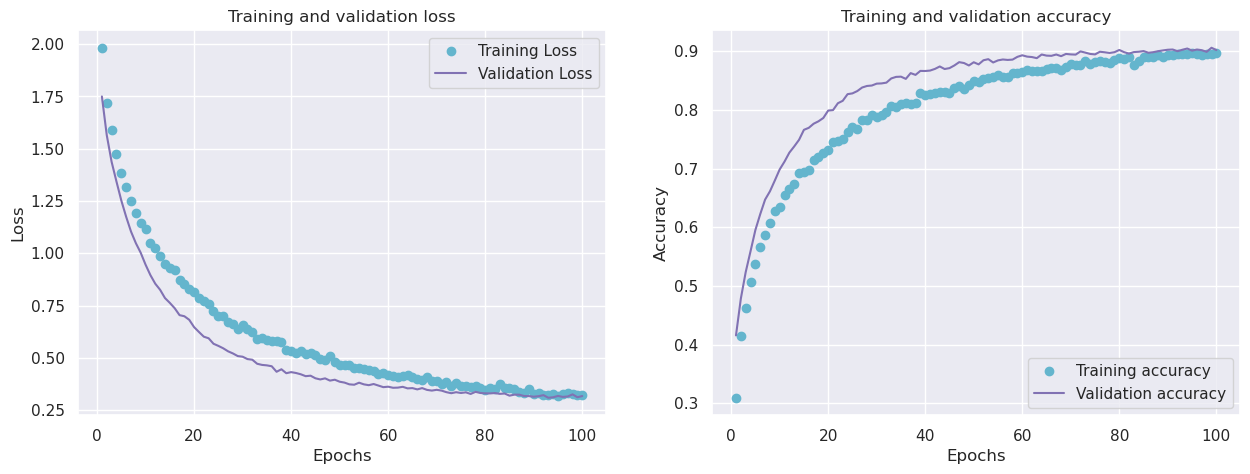

In [353]:
#Adapted from Deep Learning with Python by Francois Chollet, 2018
history_dict=history.history
loss_values=history_dict['loss']
acc_values=history_dict['acc']
val_loss_values = history_dict['val_loss']
val_acc_values=history_dict['val_acc']
epochs=range(1,101)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
ax1.plot(epochs,loss_values,'co',label='Training Loss')
ax1.plot(epochs,val_loss_values,'m', label='Validation Loss')
ax1.set_title('Training and validation loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.legend()
ax2.plot(epochs,acc_values,'co', label='Training accuracy')
ax2.plot(epochs,val_acc_values,'m',label='Validation accuracy')
ax2.set_title('Training and validation accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.legend()
plt.show()

**Matriz de confusión**

La matriz de confusión muestra un pesimo desempeño con el acento filipino y tiene sentido por que son muy pocos los audios de entrenamiento. Para los demas acentos se oberva un desempeño bastante alto identificando correctamente los acentos 

In [364]:

classes=classes
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, xticklabels=classes, yticklabels=classes, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

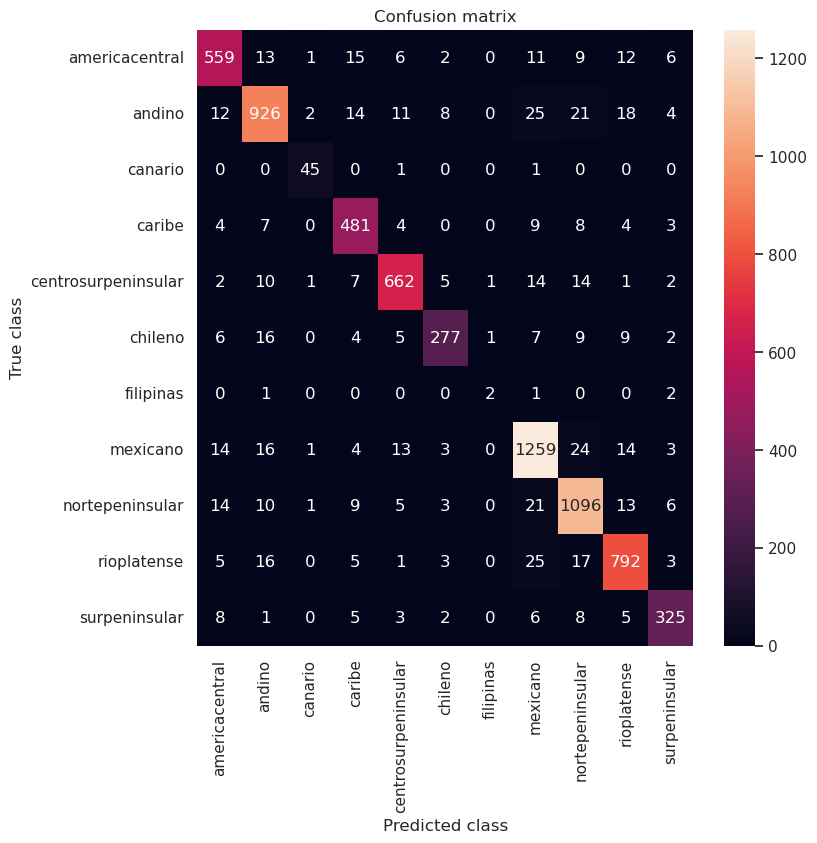

In [365]:
mostrar_resultados(y_test, np.argmax(y_pred,axis=1))

**Accuracy**

La exactitud (accuracy) mide el porcentaje de casos que el modelo ha acertado y para este modelo acierta el 99.67% de las veces el cual es un muy buen numero debido a que acierta la mayoria de las veces a pesar de tener 11 diferentes acentos

In [367]:
score, acc = model.evaluate(X_train,y_train)

print('Test score:', score)
print('Test accuracy:', acc)

print("Accuracy: {0:.2%}".format(acc))


497/497 [==============================] - 0s 874us/step - loss: 0.0406 - acc: 0.9967
Test score: 0.04055236652493477
Test accuracy: 0.9967271089553833
Accuracy: 99.67%


**Reporte de clasificación**

La calidad del modelo es muy  precisa con la mayoria de acentos exceptuando el filipino y para el caso del recall con valores muy similares es decir el modelo identifica muy bien los acentos con excepción de nuevo del filipino, El valor F1 se utiliza para combinar las medidas de precision y recall en un sólo valor y tenemos tambien resultados similares y solo con un valor muy bajo para el acento filipino mostrando un modelo suficientemente robusto.

In [370]:

print(classification_report(y_test, np.argmax(y_pred,axis=1),target_names=classes))

                     precision    recall  f1-score   support

     americacentral       0.90      0.88      0.89       634
             andino       0.91      0.89      0.90      1041
            canario       0.88      0.96      0.92        47
             caribe       0.88      0.93      0.90       520
centrosurpeninsular       0.93      0.92      0.93       719
            chileno       0.91      0.82      0.87       336
          filipinas       0.50      0.33      0.40         6
           mexicano       0.91      0.93      0.92      1351
    nortepeninsular       0.91      0.93      0.92      1178
        rioplatense       0.91      0.91      0.91       867
      surpeninsular       0.91      0.90      0.90       363

           accuracy                           0.91      7062
          macro avg       0.87      0.85      0.86      7062
       weighted avg       0.91      0.91      0.91      7062



In [377]:
model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_210 (Dense)           (None, 23)                552       
                                                                 
 dropout_162 (Dropout)       (None, 23)                0         
                                                                 
 dense_211 (Dense)           (None, 512)               12288     
                                                                 
 dropout_163 (Dropout)       (None, 512)               0         
                                                                 
 dense_212 (Dense)           (None, 512)               262656    
                                                                 
 dropout_164 (Dropout)       (None, 512)               0         
                                                                 
 dense_213 (Dense)           (None, 256)             

**Resumen del modelo**

El modelo usa un total de 409651 parametros, entrenado con 100 epocas evitando el sobre ajuste y de igual manera realizando early stopping y usando varios dropout en las diferentes capas, asi como 512 muestras que se le entregan a la red para entrenamiento.

En la arquitectura tenemos una capa con las 23 variables como variable input y con 23 neuronas y con una función de activación relu, las siguientes 2 capas 512 neuronas y activación relu y usando dropout para evitar sobreajuste, posteriormente otra capa con 256 neuronas y activación relu tambien con un dropout y por ultimo una capa densa con 11 neuronas que genera los 11 acentos en los que el modelo clasifica las grabaciones de audio y se usa una función de activación softmax

**Resultados del modelo**

El modelo presenta un muy buen desempeño con 10 de los 11 acentos,encontrando un desempeño bajo con el acento filipino debido a los pocos audios de entrenamiento. Para todos los demas el modelo identifica muy bien los diferentes acentos como los muestran las metricas del accuracy 99.67%, recall 82-92% f1 score 87-93%

**Recomendaciones**

Se recomienda realizar realizar este modelo con un data set mas robusto con muchos mas audios para entrenamiento y de esta manera mejorar las metricas para el caso principalmente del acento filipino.

Se recomienda evaluar el modelo con grabaciones propias y crear una aplicación para probar con diferentes personas la calidad del modelo predictivo.

In [378]:
import joblib
# se guarda el modelo
filename = 'modelo_acentos.sav'
joblib.dump(model, filename)

2023-05-28 13:05:13.559454: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ram://4daf186c-4b31-44ba-b977-c513b78628cc/assets


['modelo_acentos.sav']